In [1]:
import sys
sys.path.append('../src/')

import os
from typing import Dict
from os import PathLike
from pathlib import Path

import data_io

from utils import breathing_signal as lib
from utils import analysis_utils as analysis
from utils import processing
from utils import plotting_utils as plotting

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
from tkinter import font
from matplotlib.gridspec import GridSpec

from matplotlib.ticker import FuncFormatter, MaxNLocator, FixedLocator
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import math 

def format_func(value, tick_number):
    return f"{value:.0f}"

from typing import Literal, Tuple

sns.set_context('talk')

import warnings
pd.options.mode.chained_assignment = None  # Ignore SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
color1='#d95f02'
color2='#1b9e77'
color3='#7570b3'

foraging_figures = r'C:\Users\tiffany.ona\OneDrive - Allen Institute\Documents\Meeting presentations\Foraging meeting\20240506\figures'

# *Intent*

This code is used to calculate the curves for different parameters in behavior: reward statistics, interpatch and intersite distribution, Markov outcome

# Reward contingencies

## Fix number experiment (batch 1)

### Number of reward in fix number experiment (batch 1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = np.append(np.repeat(5, 3), np.repeat(0, 7))

plt.plot(x, y, color=color1, marker='o')

x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = np.repeat(0, 10)

plt.plot(x, y, color=color2, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('Volume per reward (ul)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
# plt.ylim(-0.1,1)
# plt.xlim(-0.5,10.5)
plt.locator_params(axis='x', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\count_volume.svg', dpi=300)

### Number of available reward volume

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = np.repeat(3, 3)
y = np.append([15,10,5], np.repeat(0, 7))

plt.plot(x, y, color=color1, marker='o')

x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = np.repeat(0, 10)

plt.plot(x, y, color=color2, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('Total volume left (ul)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
# plt.ylim(-0.1,1)
# plt.xlim(-0.5,10.5)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\count_volume.svg', dpi=300)

### Prob(reward) changes

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = np.append(np.repeat(1, 3), np.repeat(0, 7))

plt.plot(x, y, color=color1, marker='o')

x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = np.repeat(0, 10)

plt.plot(x, y, color=color2, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('P(reward)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
plt.ylim(-0.05,1.1)
# plt.xlim(-0.5,10.5)
plt.locator_params(axis='x', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\count_prob.svg', dpi=300)

## Volume count (batch 2)

### Amount of water

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = [7,7,7,0,0,0,0,0,0,0]

plt.plot(x, y, color=color1, marker='o')

x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = [3,3,3,3,3,3,3,0,0,0]

plt.plot(x, y, color=color2, marker='o')

y = np.repeat(0, 10)
plt.plot(x, y, color=color3, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('Volume per stop (ul)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
# plt.ylim(-0.1,1)
# plt.xlim(-0.5,10.5)
plt.locator_params(axis='x', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\intercept_experiment_volume.svg', dpi=300)

### Reward available

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = [21,14,7,0,0,0,0,0,0,0]

plt.plot(x, y, color=color1, marker='o')

x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = [21,18,15,12,9,6,3,0,0,0]

plt.plot(x, y, color=color2, marker='o')

y= np.repeat(0, 10)
plt.plot(x, y, color=color3, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('Total reward available (ul)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
# plt.ylim(-0.1,1)
# plt.xlim(-0.5,10.5)
plt.locator_params(axis='x', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\_available_reward.svg', dpi=300)

### P(reward)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = [0.9,0.9,0.9,0,0,0,0,0,0,0]

plt.plot(x, y, color=color1, marker='o')

x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = [0.9,0.9,0.9,0.9,0.9,0.9,0.9,0,0,0]

plt.plot(x, y, color=color2, marker='o')

y= np.repeat(0, 10)
plt.plot(x, y, color=color3, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('P(reward)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
plt.ylim(-0.05,1)
# plt.xlim(-0.5,10.5)
plt.locator_params(axis='x', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\preward_reward.svg', dpi=300)

### Average amount of water per stop

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
y = [7*0.9, 7*0.9, 7*0.9, (6.3+6.3+6.3)/4, (6.3+6.3+6.3)/5, (6.3+6.3+6.3)/6, (6.3+6.3+6.3)/7, (6.3+6.3+6.3)/8, (6.3+6.3+6.3)/9, (6.3+6.3+6.3)/10]

plt.plot(x, y, color=color1, marker='o')

y = [3*0.9, 3*0.9, 3*0.9, (3*0.9+3*0.9+3*0.9)/4, (3*0.9+3*0.9+3*0.9)/5, (3*0.9+3*0.9+3*0.9)/6, (3*0.9+3*0.9+3*0.9)/7, (3*0.9+3*0.9+3*0.9)/8, (3*0.9+3*0.9+3*0.9)/9, (3*0.9+3*0.9+3*0.9)/10]
plt.plot(x, y, color=color2, marker='o')

y = np.repeat(0, 10)
plt.plot(x, y, color=color3, marker='o')

plt.xlabel('Rewards collected')
plt.ylabel('Average reward per stop')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
# plt.ylim(-0.1,1)
# plt.xlim(-0.5,10.5)
plt.locator_params(axis='x', nbins=4)
sns.despine()
plt.tight_layout()

fig.savefig(foraging_figures+'\_average_stop_reward.svg', dpi=300)

## Volume decrease (batch 2b)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
a = 7
b = math.e  # Amplitude
# c = 0.1284
c = 0.1782
d = 0

# Generate x values
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color1, marker='o')
plt.text(1, 6.8, f'a = {a}', color=color1)

a = 3
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color2, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('Wolume (ul)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
# plt.ylim(-0.1,1)
# plt.xlim(-0.5,10.5)
plt.text(1.5, 2.75, f'a = {a}', color=color2)
plt.locator_params(axis='x', nbins=4)


a = 0
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color3, marker='o')
plt.xlabel('Rewards collected')
plt.ylabel('Wolume (ul)')
# # plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
# plt.ylim(-0.1,1)
# plt.xlim(-0.5,10.5)
plt.text(2, 0.25, f'a = {a}', color=color3)
plt.locator_params(axis='x', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\intercept_experiment_volume_decrease.svg', dpi=300)

## P(reward) experiment (batch 3)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
a = 0.6
# c = 0.1284
c = 0.1782
d = 0

# Generate x values
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color2, marker='o')
plt.text(0.25, 0.25, f'a = {a}', color=color2)

a = 0.9
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color1, marker='o')
plt.text(2, 0.75, f'a = {a}', color=color1)

a = 0.0
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color3, marker='o')
plt.text(3, 0.05, f'a = {a}', color=color3)

plt.xlabel('Rewards collected')
plt.ylabel('p(reward)')
# plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
plt.ylim(-0.1,1)
plt.xlim(-0.5,10.5)

plt.locator_params(axis='x', nbins=4)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\intercept_experiment_P_reward.svg', dpi=300)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
# Generate x values
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
b = 0.354189

# Define parameters for the exponential function
a = 0.9  # Amplitude
y = a * np.exp(-b * x)
plt.plot(x+1, y, color=color1)
plt.text(1.2, a, f'a = {a}', color=color1)

a = 0.6  # Amplitude
y = a * np.exp(-b * x)
plt.plot(x+1, y, color=color2)
plt.text(1, 0.05, f'a = {a}', color=color2)
plt.xlabel('Rewards collected')
plt.ylabel('P(reward)')
plt.locator_params(axis='y', nbins=3)
plt.ylim(0,1)
plt.xlim(0.5,10)

sns.despine()
plt.tight_layout()
fig.savefig(pdf_path+'\intercept_experiment.svg', dpi=300)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
a = 0.9
b = math.e  # Amplitude
c = 0.17
d = 0

# Generate x values
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color2, linewidth=3)
plt.text(0.05, 0.15, f'c = {c}', color=color1)

c = 0.3
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color1, linewidth=3)
plt.text(3, 0.6, f'c = {c}', color=color2)

a = 0
y = a * pow(b, -c * x) + d
plt.plot(x, y, color=color3, linewidth=3)
plt.text(3.5, 0.05, f'c = {a}', color=color3)

plt.xlabel('Rewards collected')
plt.ylabel('p(reward)')
# plt.hlines(0.6, 10, 0.6, color='k', linestyle='--')
plt.ylim(-0.1,1)
plt.xlim(-0.5,10.5)

plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=3)

sns.despine()
plt.tight_layout()
fig.savefig(foraging_figures+'\\rate_experiment_P_reward.svg', dpi=300)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
# Generate x values
x = np.linspace(0, 10, 10)  # Generate 100 points between 0 and 5
b = 0.354189

# Define parameters for the exponential function
a = 0.9  # Amplitude
y = a * np.exp(-b * x)
plt.plot(x+1, y, color=color1)
plt.text(1.2, a, f'a = {a}', color=color1)

a = 0.6  # Amplitude
y = a * np.exp(-b * x)
plt.plot(x+1, y, color=color2)
plt.text(1, 0.05, f'a = {a}', color=color2)
plt.xlabel('Rewards collected')
plt.ylabel('P(reward)')
plt.locator_params(axis='y', nbins=3)
plt.ylim(0,1)
plt.xlim(0.5,10)

sns.despine()
plt.tight_layout()
fig.savefig(pdf_path+'\intercept_experiment.svg', dpi=300)

### First stage learning

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
x = np.linspace(0, 20, 20)  # Generate 100 points between 0 and 5
a = 0.9
b = 2.718  # Amplitude
c = 0.025
d = 0
# Generate x values
y = a * pow(b, -c * x) + d
plt.plot(x+1, y, color=color2, marker='o')

# a = 0.6
# b = 2.718  # Amplitude
# d = 0
# # Generate x values
# y = a * pow(b, -c * x) + d
# plt.plot(x+1, y, color=color1, marker='o')

plt.xlabel('Rewards collected')
plt.ylabel('P(reward)')
plt.locator_params(axis='y', nbins=3)
# # plt.hlines(3, 0, 21, color='k', linestyle='--')
plt.ylim(0,1)
plt.xlim(0.5,10)

# # Prepare the observed data points
# x_data = np.arange(1, 11)
# y_data = np.array([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0])

# # Plot the observed data points and the fitted exponential curve
# plt.scatter(x_data, y_data, label='Observed Data')

sns.despine()
plt.tight_layout()
fig.savefig(pdf_path+'\intercept_experiment_volume.svg', dpi=300)

## Habitat

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)
x = np.linspace(0, 20, 20)  # Generate 100 points between 0 and 5
a = 0.9
b = 2.718  # Amplitude
c = 0.6
d = 0
# Generate x values
y1 = a * pow(b, -c * x) + d
ax[0].plot(x+1, y1, color=color2)

a = 0.9
b = 2.718  # Amplitude
c = 0.25
d = 0
y2 = a * pow(b, -c * x) + d
ax[0].plot(x+1, y2, linestyle=':',color=color2)

a = 0.9
b = 2.718  # Amplitude
c= 0.25
d = 0
# Generate x values
y3 = a * pow(b, -c * x) + d
ax[1].plot(x+1, y3, linestyle=':',  color=color1)

a = 0.5
b = 2.718  # Amplitude
c= 0.25
d = 0
y4 = a * pow(b, -c * x) + d
ax[1].plot(x+1, y4, color=color1)

ax[0].set_xlabel('Rewards collected')
ax[1].set_xlabel('Rewards collected')
ax[0].set_ylabel('P(reward)')
ax[0].set_title('Habitat 1')
ax[1].set_title('Habitat 2')

ax[2].plot(x+1, (y1+y2)/2, color=color2)
ax[2].plot(x+1, (y3+y4)/2, color=color1)
ax[2].set_xlabel('Rewards collected')
ax[2].set_title('Average')

plt.locator_params(axis='y', nbins=3)
plt.ylim(0,1)
plt.xlim(0,10)

sns.despine()
plt.tight_layout()
fig.savefig(pdf_path+'\habitat_experiment.svg', dpi=300)

# Intersites and Interpatch distances

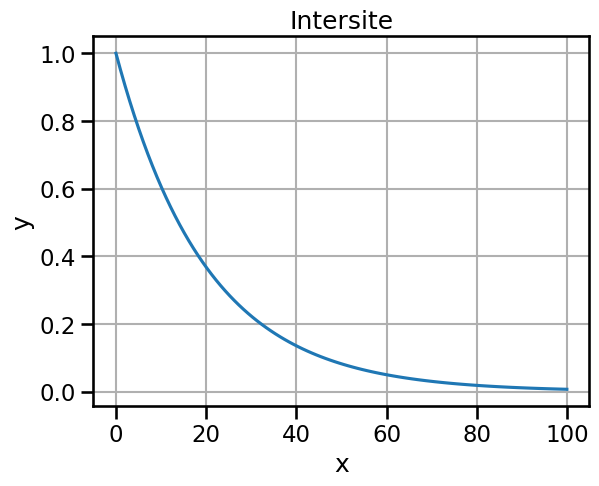

In [23]:
# Generate x values
x = np.linspace(0, 100, 100)

A = 1  # Initial value or amplitude
b = 0.05  # Rate of decay

# Calculate y values for exponential decay curve
y = A * np.exp(-b * x)

# Plot the exponential curve
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersite')
plt.grid(True)
plt.show()

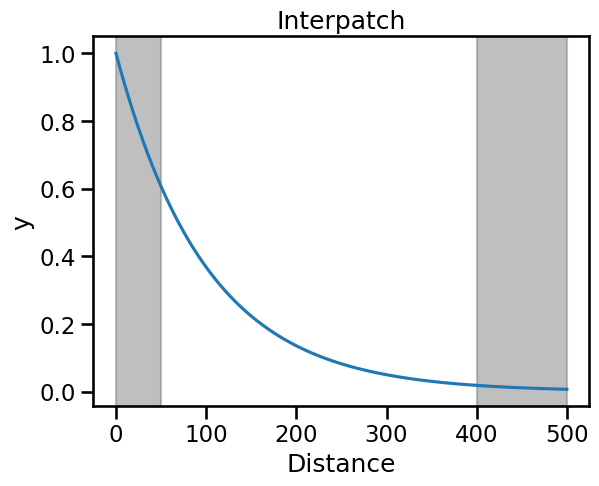

In [62]:
# Generate x values
x = np.linspace(0, 500, 100)

b = 0.01  # Rate of decay

# Calculate y values for exponential decay curve
y = np.exp(-b * x)

# Plot the exponential curve
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpatch')
plt.axvspan(0, 50, color='gray', alpha=0.5)
plt.axvspan(400, 500, color='gray', alpha=0.5)
plt.xlabel('Distance')
# plt.grid(True)
plt.show()

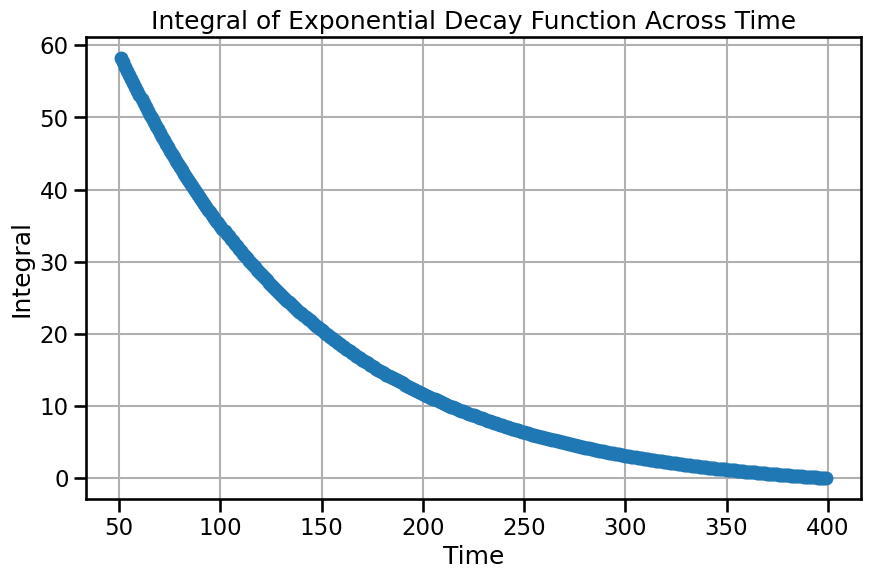

In [52]:
def exponential_integral_incremental(start_time, end_time):
    """
    Calculate the integral of exponential decay function incrementally starting from start_time.

    Parameters:
    - start_time: Start time of the interval.
    - end_time: End time of the interval.

    Returns:
    - times: List of time points.
    - integrals: List of integrals starting from each time point.
    """

    # Define the decay rate
    decay_rate = 0.01

    # Initialize lists to store time points and integrals
    times = []
    integrals = []

    # Iterate over time points
    for t in range(start_time + 1, end_time):
        # Calculate the integral from t to end_time
        integral = -100 * (np.exp(-decay_rate * end_time) - np.exp(-decay_rate * t))

        # Append the time point and integral to the respective lists
        times.append(t)
        integrals.append(integral)

    return times, integrals

# Example usage:
start_time = 50
end_time = 400
times, integrals = exponential_integral_incremental(start_time, end_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(times, integrals, marker='o', linestyle='-')
plt.title('Integral of Exponential Decay Function Across Time')
plt.xlabel('Time')
plt.ylabel('Integral')
plt.grid(True)
plt.show()


# Markov matrix for retrieving next patch

In [22]:
def simulate_markov_chain(transition_matrix, initial_state, num_steps):
    num_states = len(transition_matrix)
    current_state = initial_state
    state_counts = [0] * num_states
    
    for _ in range(num_steps):
        # Increment the count for the current state
        state_counts[current_state] += 1
        
        # Transition to the next state probabilistically
        probabilities = transition_matrix[current_state]
        next_state = np.random.choice(np.arange(num_states), p=probabilities)
        current_state = next_state
    
    state_counts_percentage = [count / num_steps * 100 for count in state_counts]

    return state_counts, np.round(state_counts_percentage,2)

# Example transition matrix
transition_matrix = np.array([[0.6, 0.35, 0.05],
                              [0.45, 0.45, 0.1],
                              [0.45, 0.45, 0.1]])

# Number of transitions to simulate
num_steps = 100

state_one = []
state_two = []
state_three = []

# Simulate the Markov chain
i = 0
while i <100:
    # Initial state
    initial_state = np.random.choice(np.arange(3))
    state_counts, state_counts_percentage = simulate_markov_chain(transition_matrix, initial_state, num_steps)
    # print("State counts after", num_steps, "transitions:", state_counts, " (", state_counts_percentage, ")", ", initial state:", initial_state)
    i+=1
    state_one.append(state_counts_percentage[0])
    state_two.append(state_counts_percentage[1])
    state_three.append(state_counts_percentage[2])
    
print("State 1: ", np.mean(state_one), ", State 2: ", np.mean(state_two), ", state 3: ",  np.mean(state_three))

State 1:  52.52 , State 2:  39.73 , state 3:  7.75


# Goodness of fit changing patch size